### Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Path

In [2]:
path_data = ".../Results/Population/"

### Read Data

In [3]:
LR_PCA = pd.read_csv(path_data + 'LR_PCA.csv')
LR_SVD = pd.read_csv(path_data + 'LR_SVD.csv')

XG_PCA = pd.read_csv(path_data + 'XG_PCA.csv')
XG_SVD = pd.read_csv(path_data + 'XG_SVD.csv')

LR_RF  = pd.read_csv(path_data + 'LR_RF.csv')
XG_RF  = pd.read_csv(path_data + 'XG_RF.csv')

### Plots

In [4]:
def plot_score_vs_components(df, score, components):

    if score not in ['AUC', 'F1-Score', 'Precision', 'Recall']:
        raise ValueError("Score must be one of 'AUC', 'F1-Score', 'Precision', 'Recall'")

    sns.set_style("whitegrid")

    plt.figure(figsize=(12, 8.5), dpi=300)
    sns.lineplot(data=df, x='number_of_components', y=score, hue='Class', marker='o', palette='bright', alpha=0.9)

    plt.title(f'{score} vs Number of {components}s', fontsize=18)
    plt.xlabel(f'Number of {components}s', fontsize=14)
    plt.ylabel(score, fontsize=14)
    plt.legend(title='Class', title_fontsize='12', fontsize='12', bbox_to_anchor=(1, 1), loc='upper left')
    plt.grid(True, which="both", ls="--")  
    plt.tight_layout()
    plt.show()

In [23]:
def plot_score_vs_components_log_scale(df, score, components):

    if score not in ['AUC', 'F1-Score', 'Precision', 'Recall']:
        raise ValueError("Score must be one of 'AUC', 'F1-Score', 'Precision', 'Recall'")

    sns.set_style("whitegrid")

    plt.figure(figsize=(12, 8.5), dpi=300) 
    sns.lineplot(data=df, x='number_of_components', y=score, hue='Class', marker='o', palette='bright', alpha=0.9)

    plt.title(f'{score} vs Number of {components}s', fontsize=18)
    plt.xlabel(f'Number of {components}s (Log Scale)', fontsize=14)
    plt.ylabel(score, fontsize=14)
    plt.legend(title='Class', title_fontsize='12', fontsize='12', bbox_to_anchor=(1, 1), loc='upper left')
    plt.xscale('log')  
    plt.xticks(df['number_of_components'], labels=df['number_of_components'], rotation=50)  
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()

In [6]:
label = 'F1-Score'

In [18]:
components1 = 'PCA'
df1 = LR_PCA[~LR_PCA.Class.isin(['Average', 'micro'])]

components2 = 'SVD'
df2 = LR_SVD[~LR_SVD.Class.isin(['Average', 'micro'])]

components3 = 'SNP'
df3 = LR_RF[~LR_RF.Class.isin(['Average', 'micro'])]

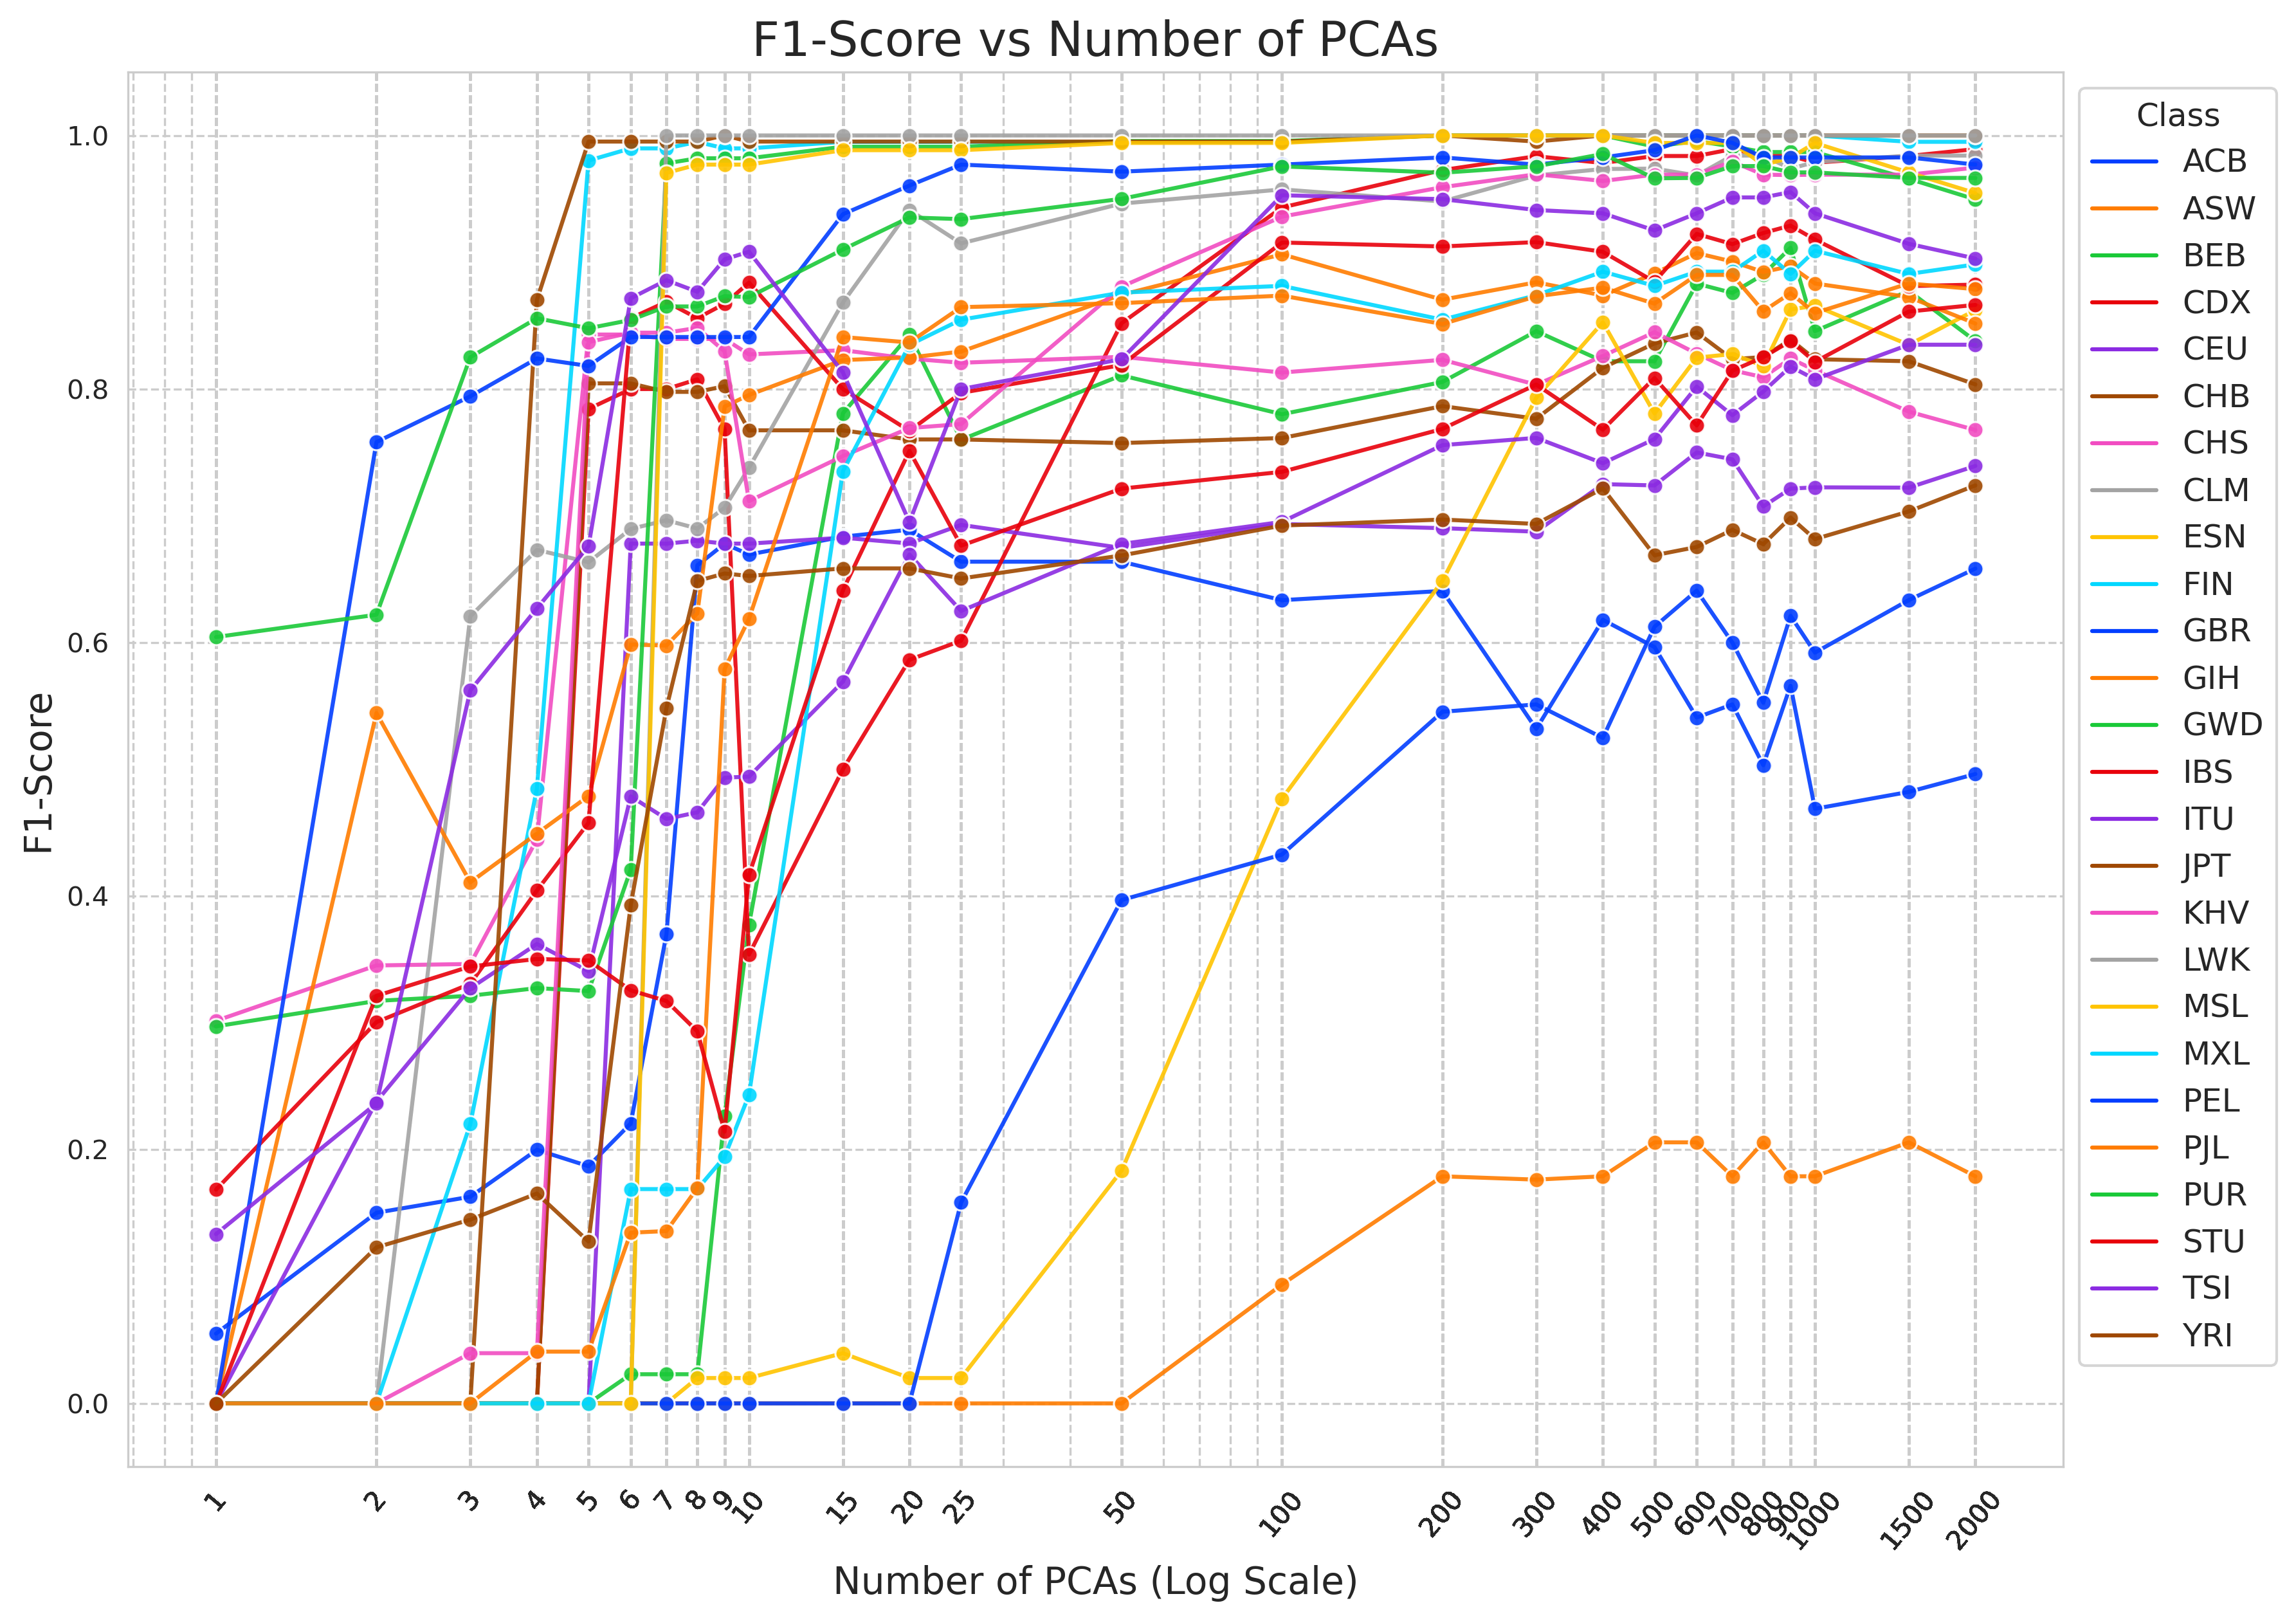

In [8]:
plot_score_vs_components_log_scale(df1, label, components1)

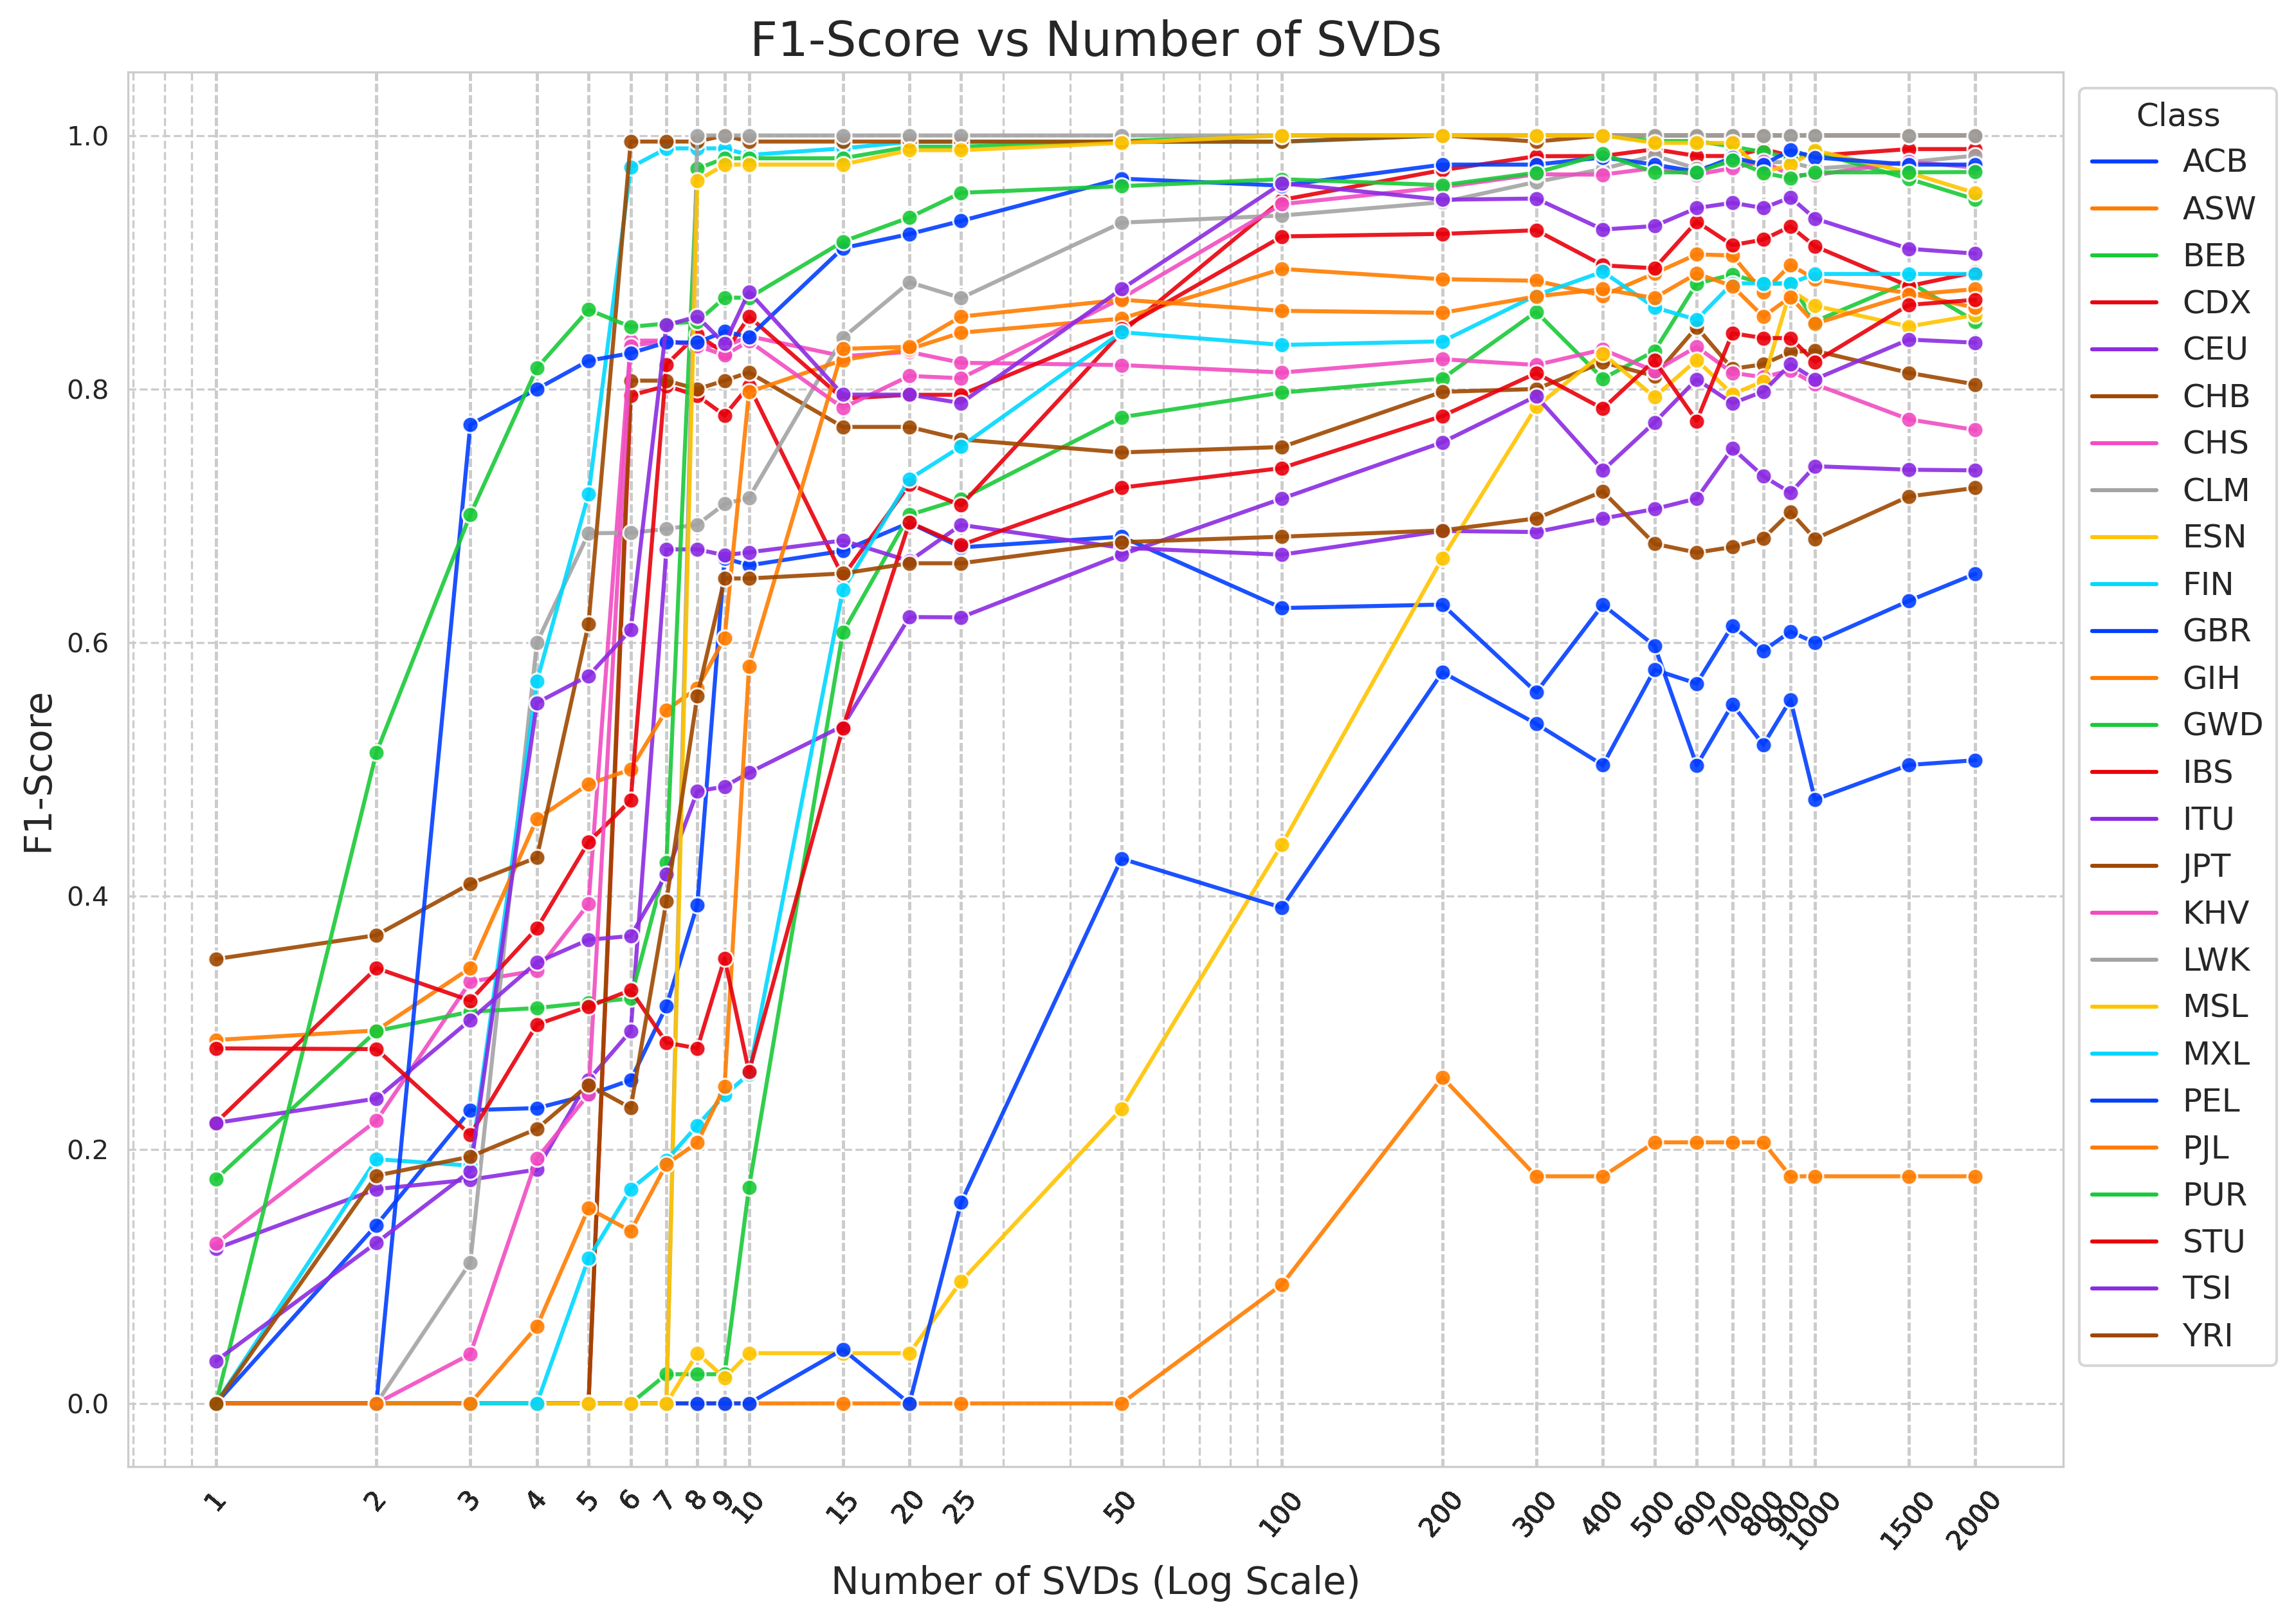

In [9]:
plot_score_vs_components_log_scale(df2, label, components2)

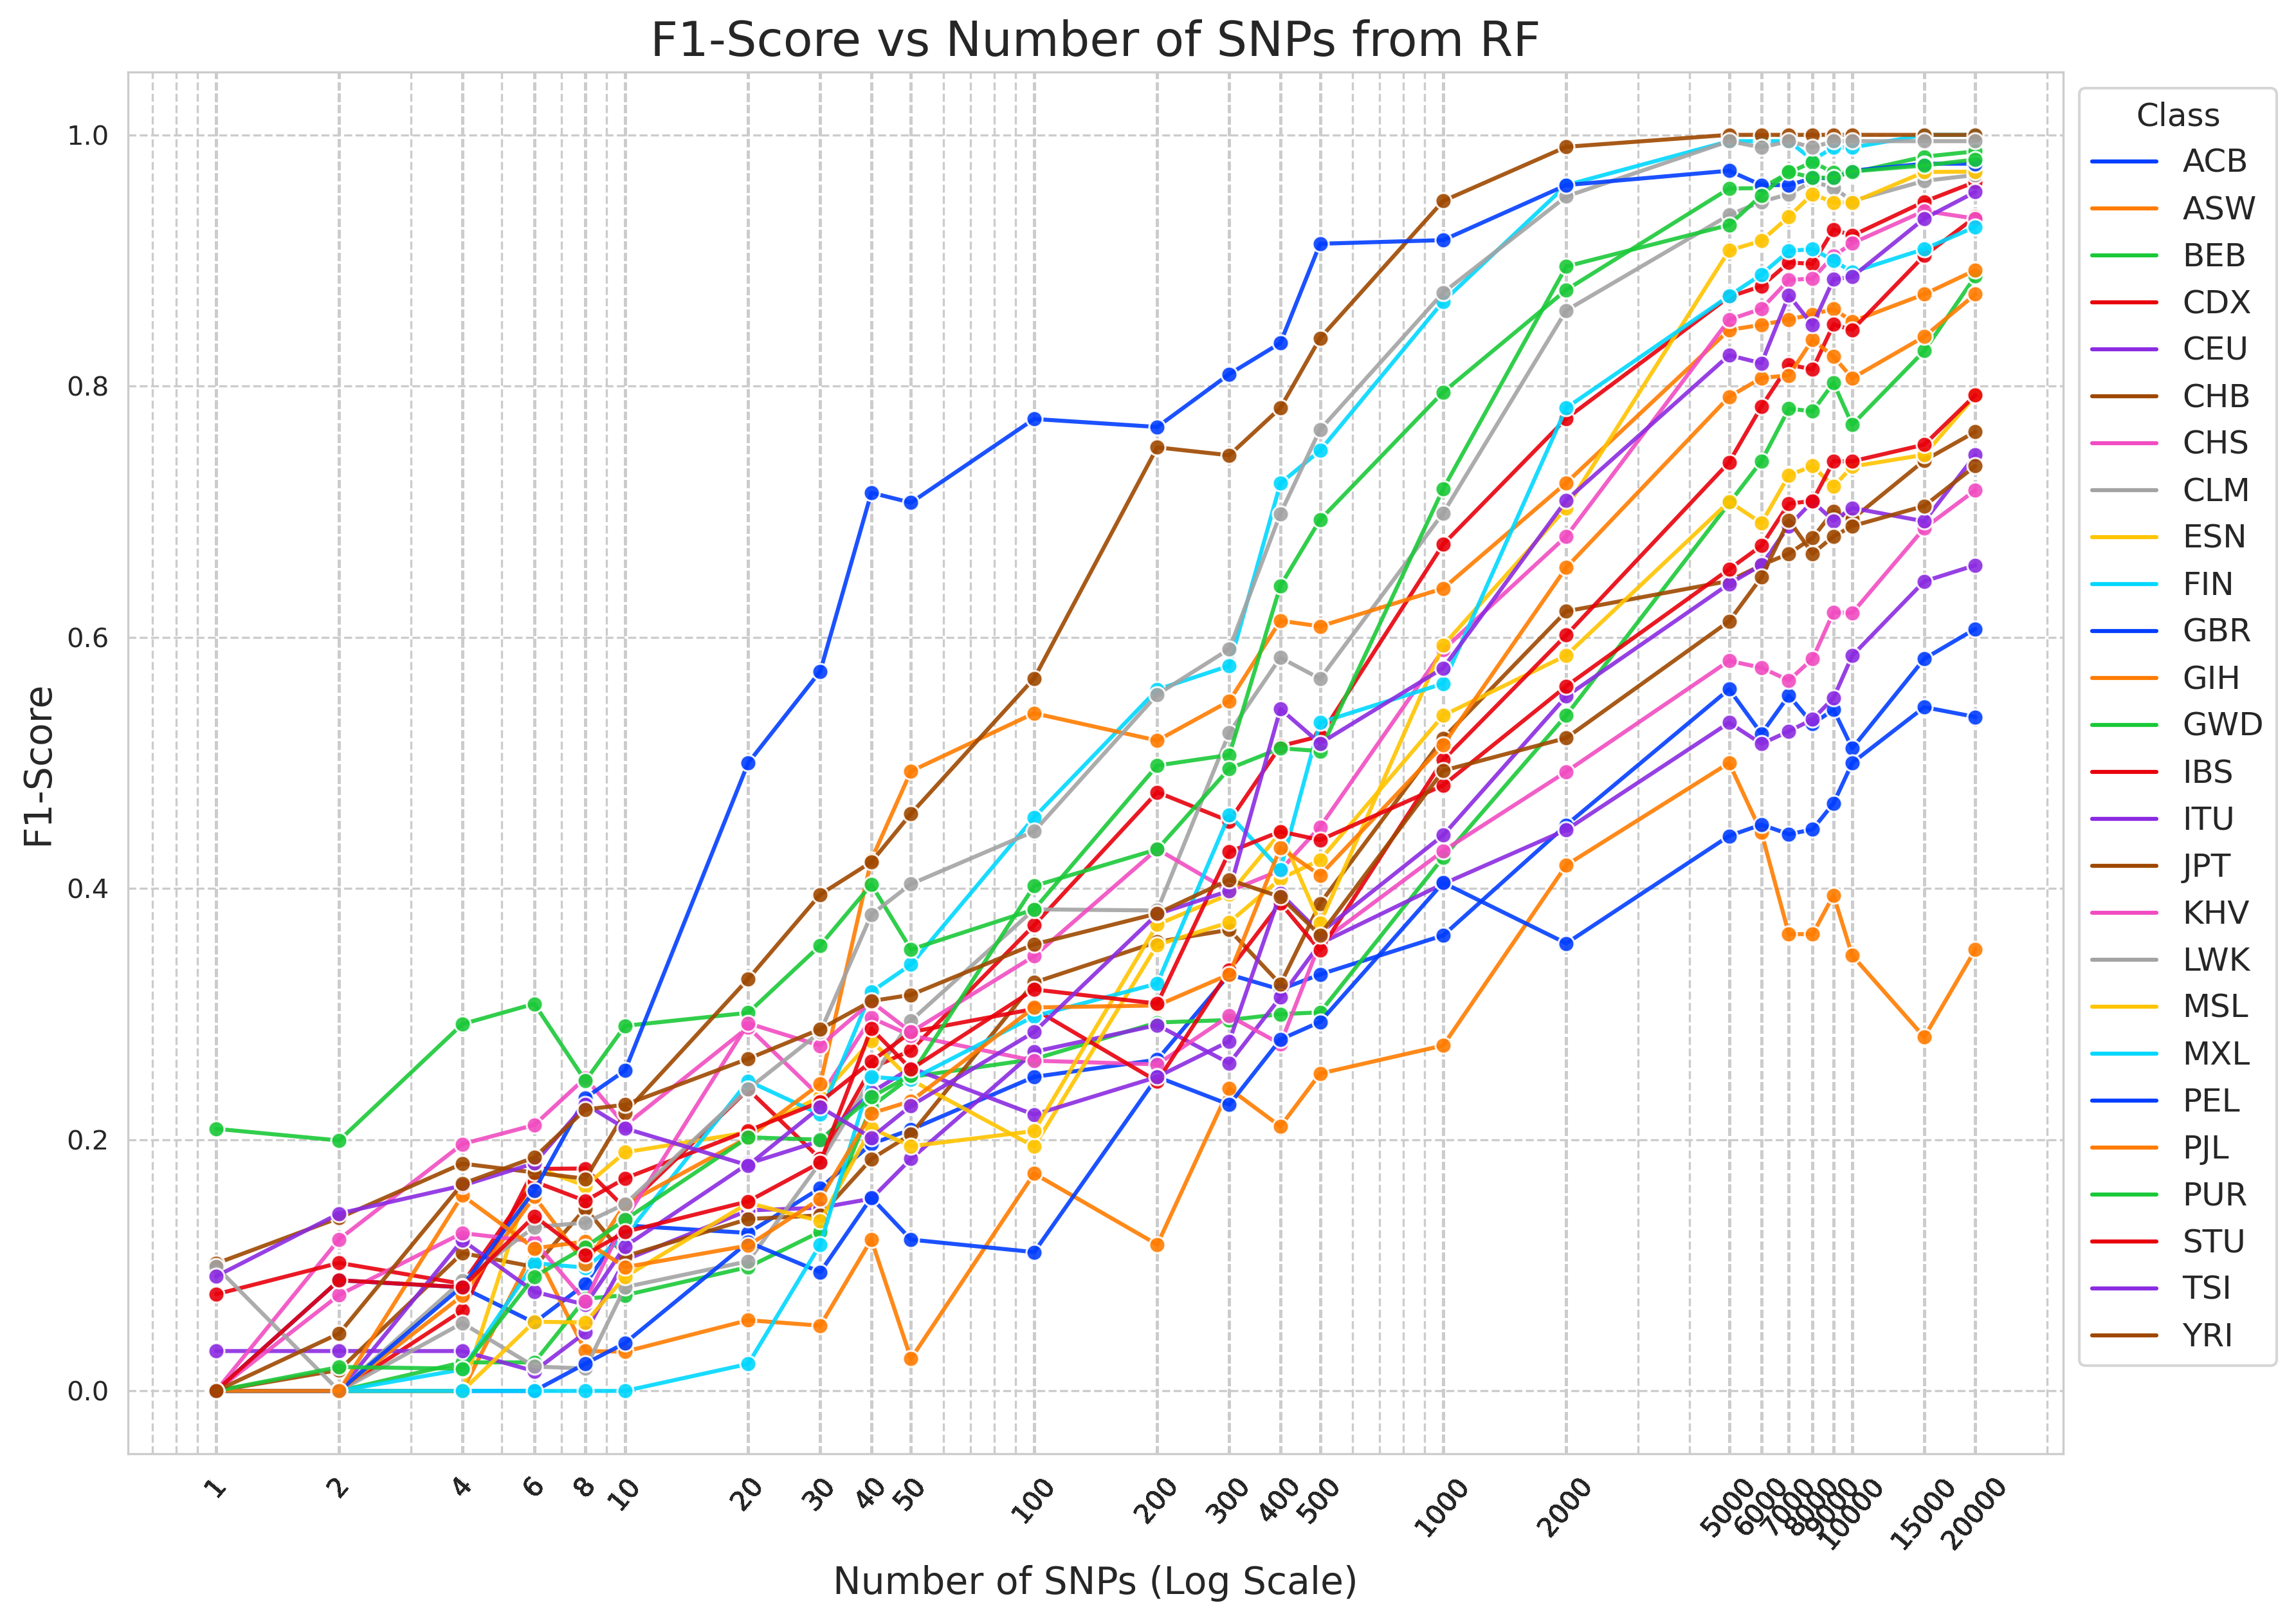

In [21]:
plot_score_vs_components_log_scale(df3, label, components3)

In [11]:
components4 = 'Components'

traget_column = 'Average'

pca = LR_PCA[LR_PCA.Class == traget_column]
svd = LR_SVD[LR_SVD.Class == traget_column]
rf  = LR_RF[LR_RF.Class == traget_column]

pca['Class'] = 'PCA'
svd['Class'] = 'SVD'
rf['Class']  = 'RF'

pca_svd = pd.concat([pca, svd])
pca_svd = pca_svd.reset_index(drop=True)

pca_svd_rf = pd.concat([pca, svd, rf])
pca_svd_rf = pca_svd_rf.reset_index(drop=True)

/tmp/ipykernel_26764/4721631.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca['Class'] = 'PCA'
/tmp/ipykernel_26764/4721631.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svd['Class'] = 'SVD'
/tmp/ipykernel_26764/4721631.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

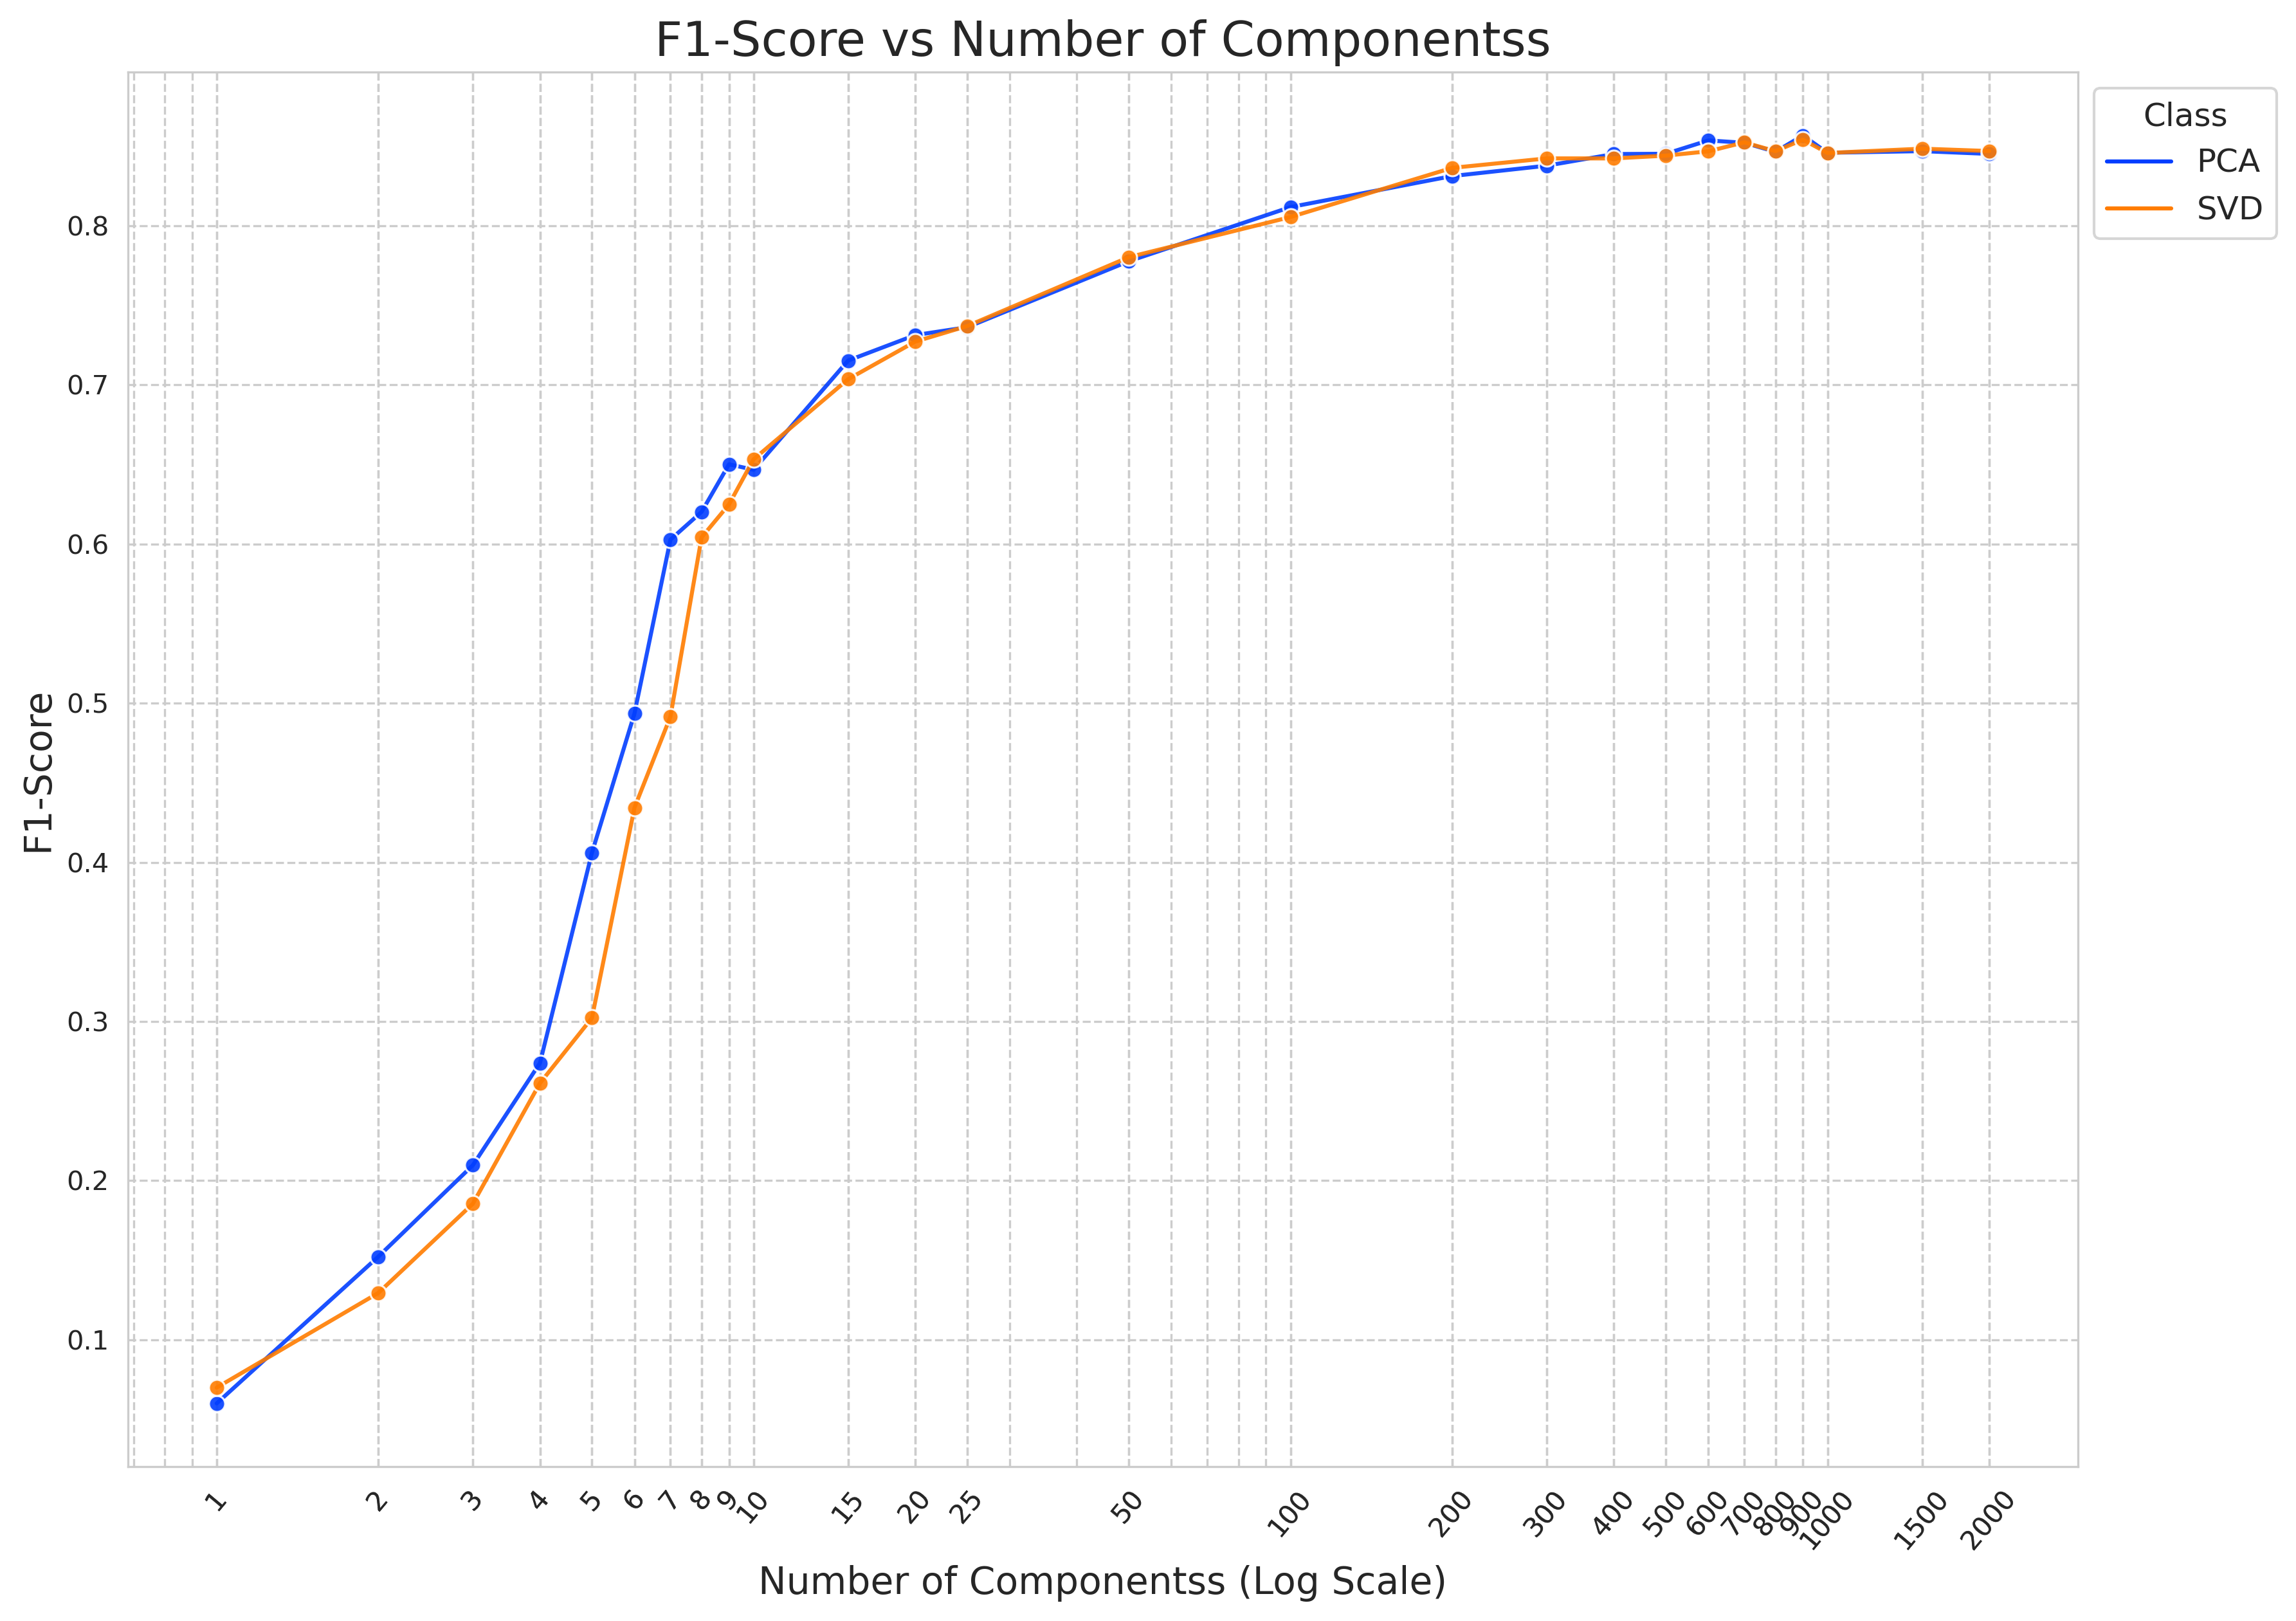

In [12]:
plot_score_vs_components_log_scale(pca_svd, label, components4)

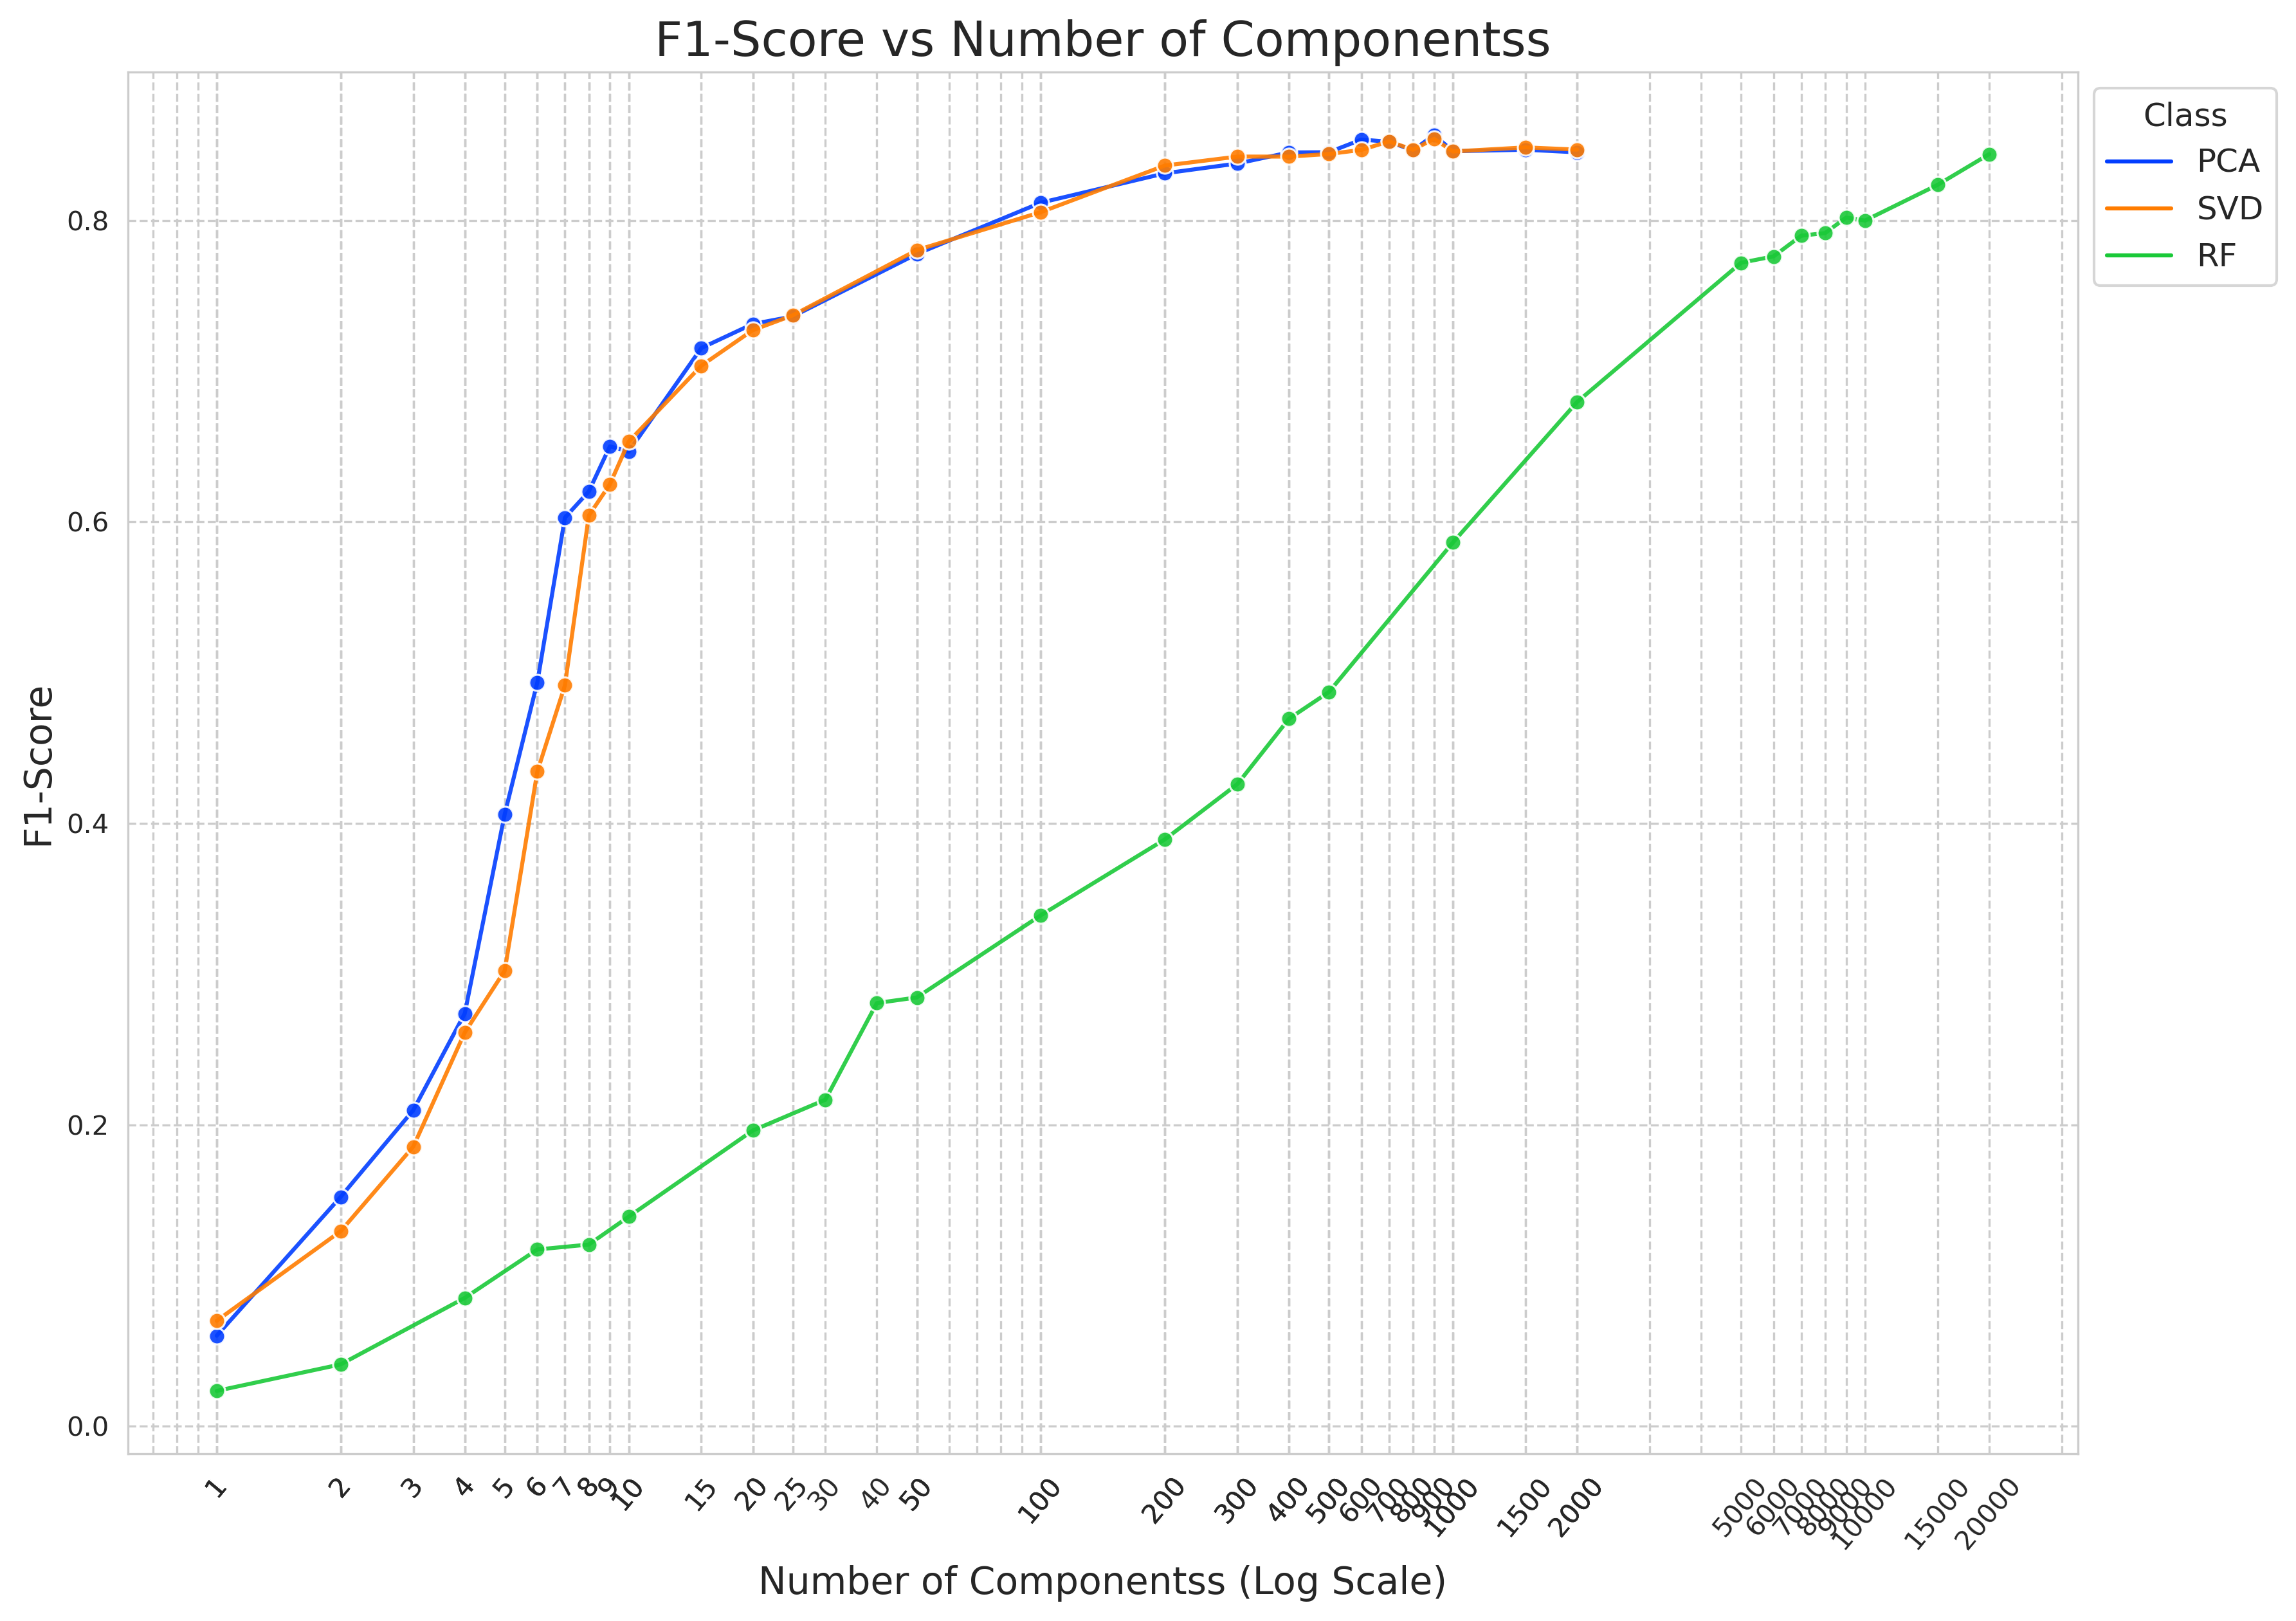

In [13]:
plot_score_vs_components_log_scale(pca_svd_rf, label, components4)

In [14]:
top_anc_pca = df1.groupby('Class').max().sort_values(by=label).reset_index()
list_of_anc_pca = list(top_anc_pca.head(4).Class)
list_of_anc_pca.extend(list(top_anc_pca.tail(4).Class))
top_pca = df1[df1.Class.isin(list_of_anc_pca)]

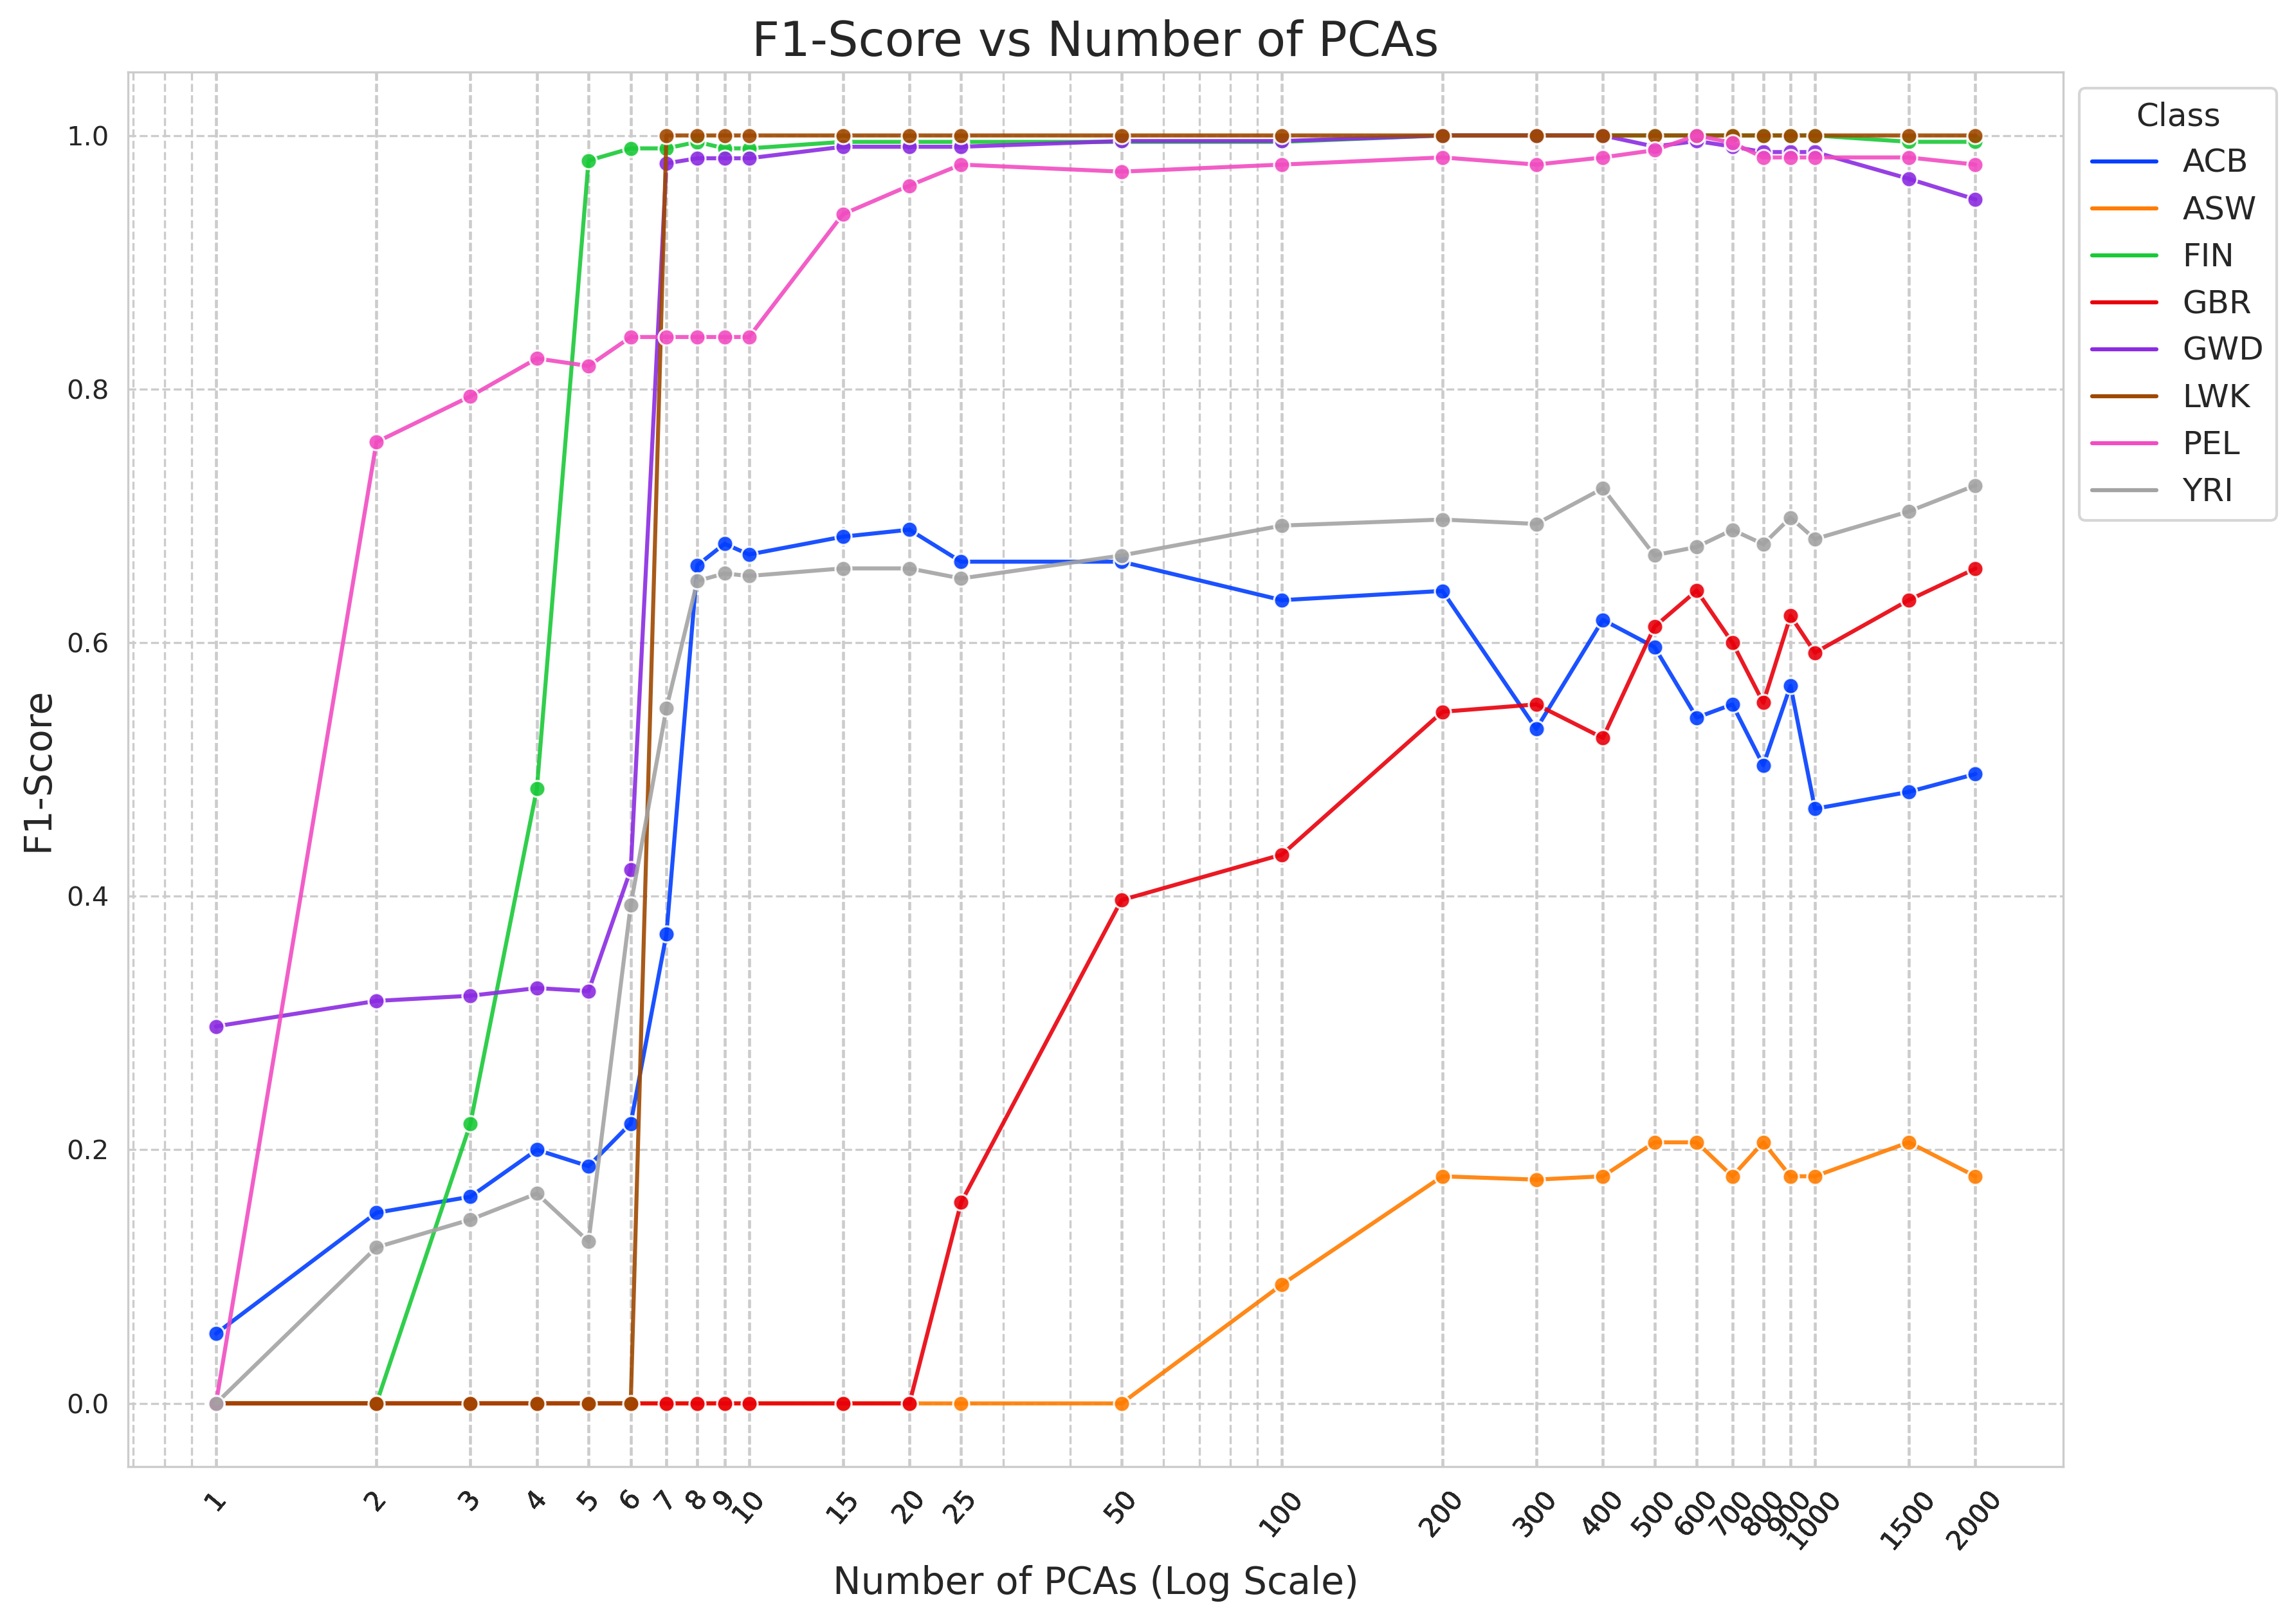

In [15]:
plot_score_vs_components_log_scale(top_pca, label, components1)

In [16]:
top_anc_rf = df3.groupby('Class').max().sort_values(by=label).reset_index()
list_of_anc_rf = list(top_anc_rf.head(4).Class)
list_of_anc_rf.extend(list(top_anc_rf.tail(4).Class))
top_rf = df3[df3.Class.isin(list_of_anc_rf)]

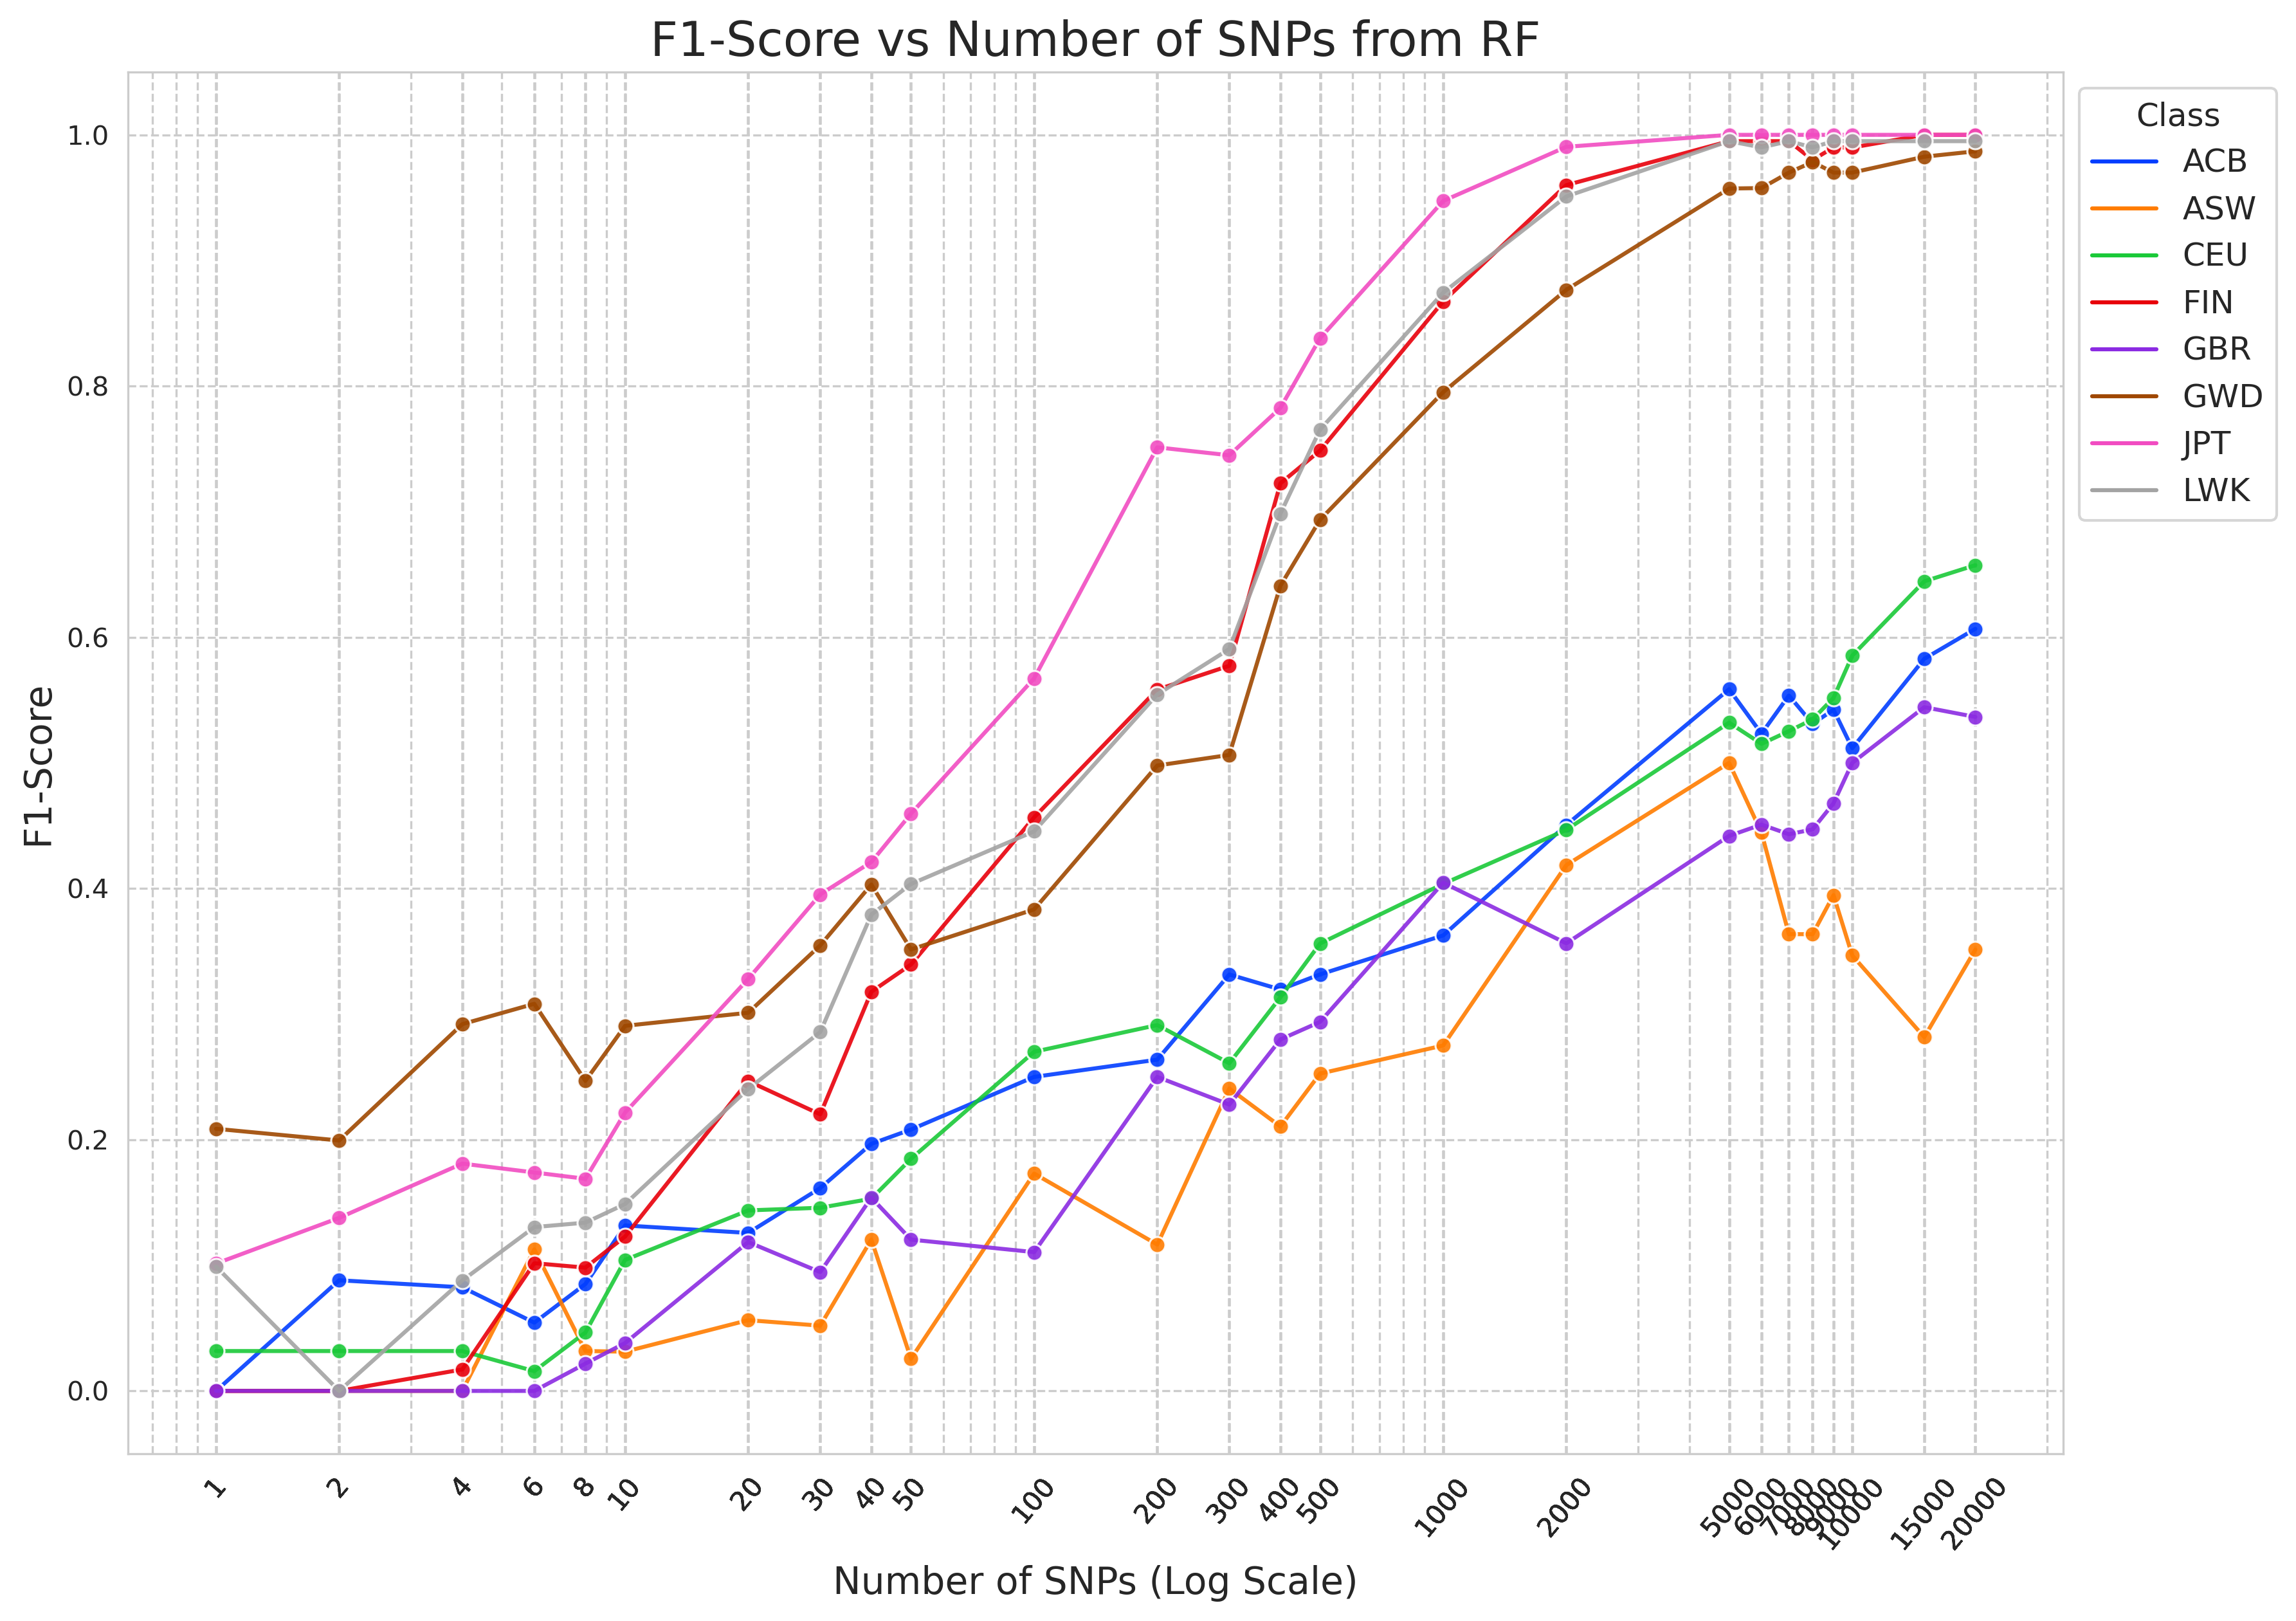

In [22]:
plot_score_vs_components_log_scale(top_rf, label, components3)